## Classification of images using in-built Models <br>

In this notebook we will look at using the most famous classification architectures with keras. Keras provides many deep learning models alongside pre-tained weights. These models can be used for prediction, feature extraction and fine-tuning. <br>
The architectures we will be using are: <br>
* VGG-Net
* ResNet

### VGG-Net: <br>

VGG-Net is a deep convolutional neural network with stack of convolution layers, max-pooling layers and fully connected layers. 

There are two versions of VGG-Net, VGG16 and VGG19. The difference is in the number of convolution layers. VGG19 utilizes more convolutions resulting more deeper network. We will use VGG16 in this tutorial.

**VGG16 Architecture:**

Below figure shows the detail architecture of VGG16. Input is at the leftmost with dimensions of 224x224x3. The input image is passed through stack of conv, pooling, and 3 FC layers followed by a softmax layer at the end. All conv filters are 3x3 and max-pooling layers are 2x2 with stride 2.<br>

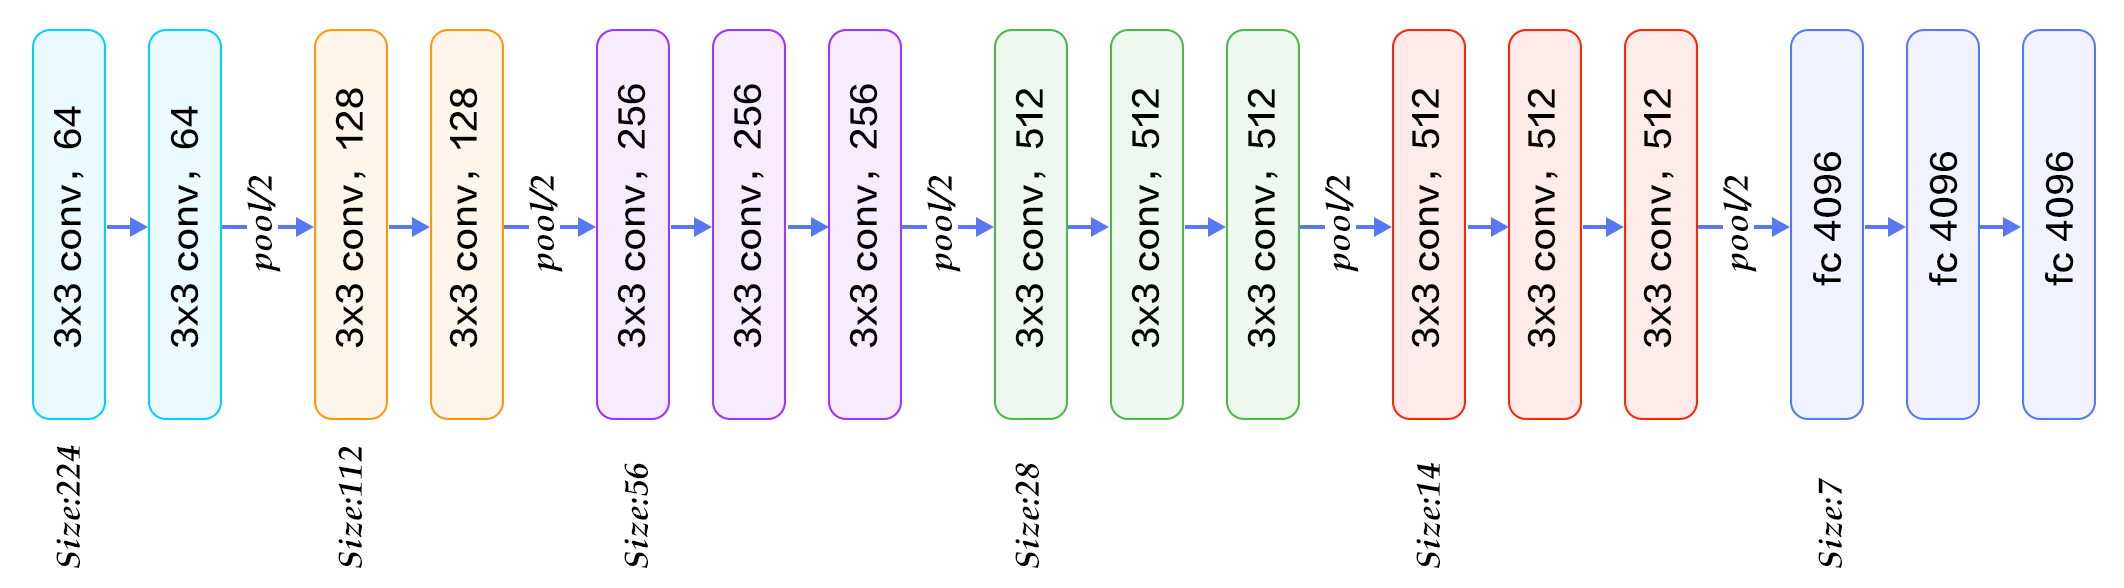

We can use this model by importing the already built model in keras `applications` library.

In [1]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

We are creating the model with weights pre-trained on ImageNet images.

In [2]:
model_vgg = VGG16(weights='imagenet')

In [3]:
model_vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In the following code section: <br>
Load a sample image and feed it to the model to predict its label. The size of image should be resized to 224x224x3 because the model takes the input of this size.<br>
After that we have converted the image instance to numpy array to work in keras. <br>
The next step is to increase the dimension of input because the model expects one or more input, so we will use expand_dims function to make the dimension of input to be (shape, rows, columns, channels). <br>
Then prepare the input for network using `preprocess_input()` function. <br> 


In [4]:
img_path = 'sample_data/lion.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

Finally `model.predict` generates predictions of input sample.

In [5]:
preds = model_vgg.predict(x)

To interpret the prediction we use the following function which basically returns a list of lists of top class prediction tuples:<br>
 (class_name, class_description, score)

In [6]:
from keras.applications.vgg16 import decode_predictions
print('predicted: ', decode_predictions(preds, top=3)[0])

predicted:  [('n02437312', 'Arabian_camel', 0.38865167), ('n02129165', 'lion', 0.3676446), ('n01871265', 'tusker', 0.08480521)]


Similarly, we will use ResNet buit-in model below.

### ResNet
ResNet uses a stack of Residual Blocks. <br>
Every residual block has two 3x3 conv layers. <br>
Max-pooling with stride 2 is used to downsample periodically by half. <br>
An additional Conv layer is used in the beginning of ResNet. <br>
After last conv layer, global average pooling is used. <br>
At the end, there is only one FC layer for output classes.

In ResNet Batch Normalization is used after every Conv Layer. <br>
Total depth can be 34, 50, 101 or 152 layers for ImageNet. <br>

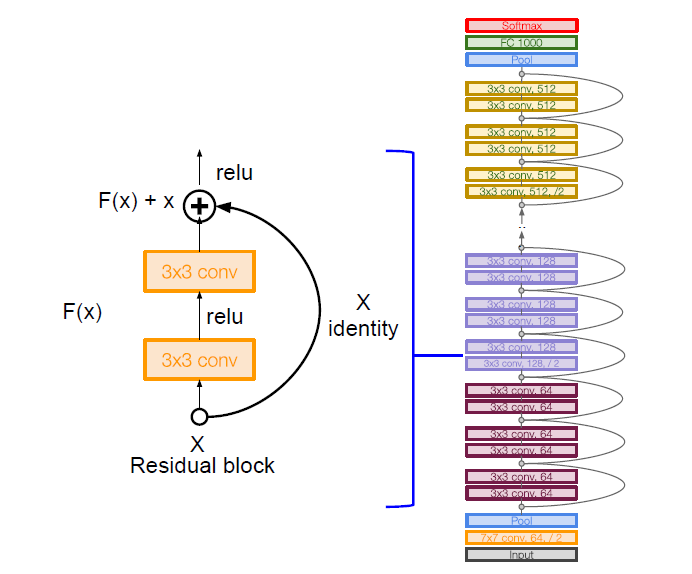

Let'classify an image using bult-in ResNet50 with weights pre-trained on ImageNet. The procedure is same as above (VGG-Net).


In [7]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

In [8]:
model_resnet = ResNet50(weights='imagenet')

In [9]:
model_resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [10]:
img_path = 'sample_data/lion.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [11]:
preds = model_resnet.predict(x)

In [12]:
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

Predicted: [('n02129165', 'lion', 0.9917556), ('n02486410', 'baboon', 0.0022370294), ('n02437312', 'Arabian_camel', 0.0020330637)]
